In [1]:
%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
import sklearn.feature_selection

C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


In [2]:
boston = pd.read_csv('Boston.csv')
boston.head()
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [3]:
y = boston.medv
X = boston.lstat.values.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

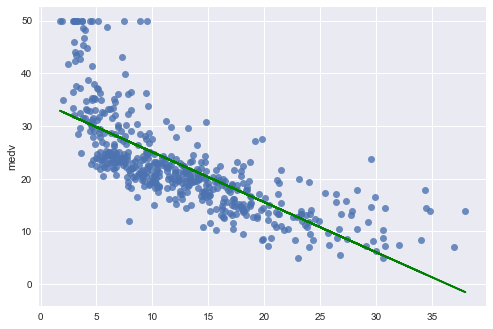

In [4]:
# plt.scatter(boston.lstat, boston.medv, color='red')
# boston.plot('lstat', 'medv', kind='scatter')
# sns.pairplot(data, x_vars = ['TV', 'Radio','Newspaper'], y_vars = ['Sales'],               
#              size =7, aspect =.7, kind = 'reg')
sns.regplot(X, y, fit_reg=False)
plt.plot(X, linreg.predict(X), color='g')

In [5]:
# some stats from sklearn
print("Coeff B0 Intercept:", linreg.intercept_)
print("Coeff B1 lstat:", linreg.coef_)
print("R squared:", linreg.score(X,y))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((linreg.predict(X) - y) ** 2))
print("Residual sum of squares: %.2f"
  % ((linreg.predict(X) - y) ** 2).sum())
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X, y))
print("F-score of lstat:", float(sklearn.feature_selection.f_regression(X,y)[0]))
print("p-value of F-score of lstat:", float(sklearn.feature_selection.f_regression(X,y)[1]))

Coeff B0 Intercept: 34.5538408794
Coeff B1 lstat: [-0.95004935]
R squared: 0.544146297586
Mean squared error: 38.48
Residual sum of squares: 19472.38
Variance score: 0.54
F-score of lstat: 601.6178711098958
p-value of F-score of lstat: 5.081103394387701e-88


In [6]:
# this is the standard import for statsmodel
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='medv ~ lstat', data=boston).fit()

# print the coefficients
lm.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [7]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()
linreg.predict(X_new)

array([-12.94862681])

In [8]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [9]:
# print the p-values for the model coefficients with statsmodels
lm.pvalues

Intercept    3.743081e-236
lstat         5.081103e-88
dtype: float64

In [10]:
# print the R-squared value for the model with statsmodel
lm.rsquared

0.5441462975864797

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           5.08e-88
Time:                        22:37:44   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm_mult = smf.ols(formula='medv ~ lstat + crim', data=boston).fit()
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     304.4
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           2.33e-87
Time:                        22:37:44   Log-Likelihood:                -1639.6
No. Observations:                 506   AIC:                             3285.
Df Residuals:                     503   BIC:                             3298.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.3192      0.574     59.816      0.000        33.192    35.446
lstat         -0.9114      0.043    -21.004      0.000        -0.997    -0.826
crim          -0.0704      0.036     -1.956      0.051        -0.141     0.000
==============================================================================
Omnibus:                      146.159   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.172
Skew:                           1.517   Prob(JB):                     3.32e-72
Kurtosis:                       5.531   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 10.   5.] [  2.93257452e-15  -2.77909629e-14   1.00000000e+01   5.00000000e+00]


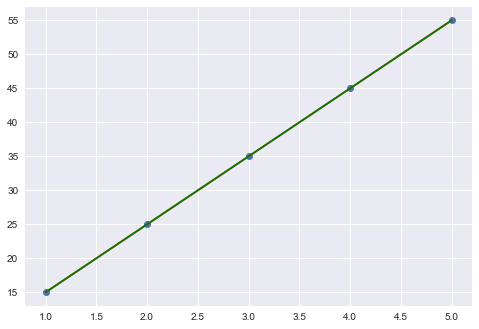

In [13]:
# 
x = np.array([1,2,3,4,5])
y = np.array([15,25,35,45,55])
xtst = np.array([10,20,30,40,50])
ytst = np.array([115,125,135,145,155])

p1 = np.polyfit(x, y, 1)
p3 = np.polyfit(x, y, 3)
print(p1, p3)
plt.plot(x, y, 'o')
plt.plot(x, np.polyval(p3, x), 'r-')
plt.plot(x, np.polyval(p1, x), 'g-')

In [14]:
np.polyval(p1, x)
print("Residual sum of squares: %.2f"
  % ((np.polyval(p3, xtst) - ytst) ** 2).sum())

Residual sum of squares: 225500.00


# Chapter 3 Exercise 8

In [15]:
auto = pd.read_csv('C:/Users/yo/Documents/ML_and_Python/ML_and_Python_books/ISLR/ISLR-python/Notebooks/Data/Auto.csv', na_values='?').dropna()


In [16]:
lr = smf.ols(formula='mpg ~ horsepower', data=auto).fit()
lr.summary()
lr_sklrn = LinearRegression()
regline = lr_sklrn.fit(auto.horsepower.values.reshape(-1, 1), auto.mpg)
response = lr_sklrn.predict(auto.horsepower.values.reshape(-1, 1))
predicted_values = lr_sklrn.predict(auto.horsepower.values.reshape(-1, 1))
lr_sklrn.predict([[98]])
lr.conf_int()


,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


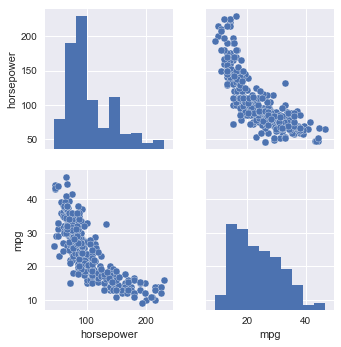

In [17]:
sns.pairplot(auto[['horsepower', 'mpg']])

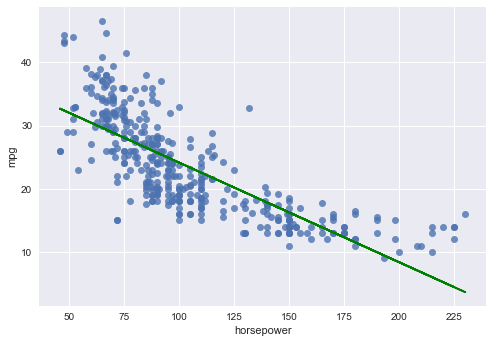

In [18]:
# (b) Plot the response and the predictor. 
# first line plots x and y, that is predictor variable and response variable
sns.regplot(auto.horsepower,auto.mpg, fit_reg=False)
# this line plots the regression line itself, which is constructed from the same x as before and predicted values based on 
# lr.predict()
plt.plot(auto.horsepower.values.reshape(-1, 1), predicted_values, 'g')

# Chapter 3 Exercise 9

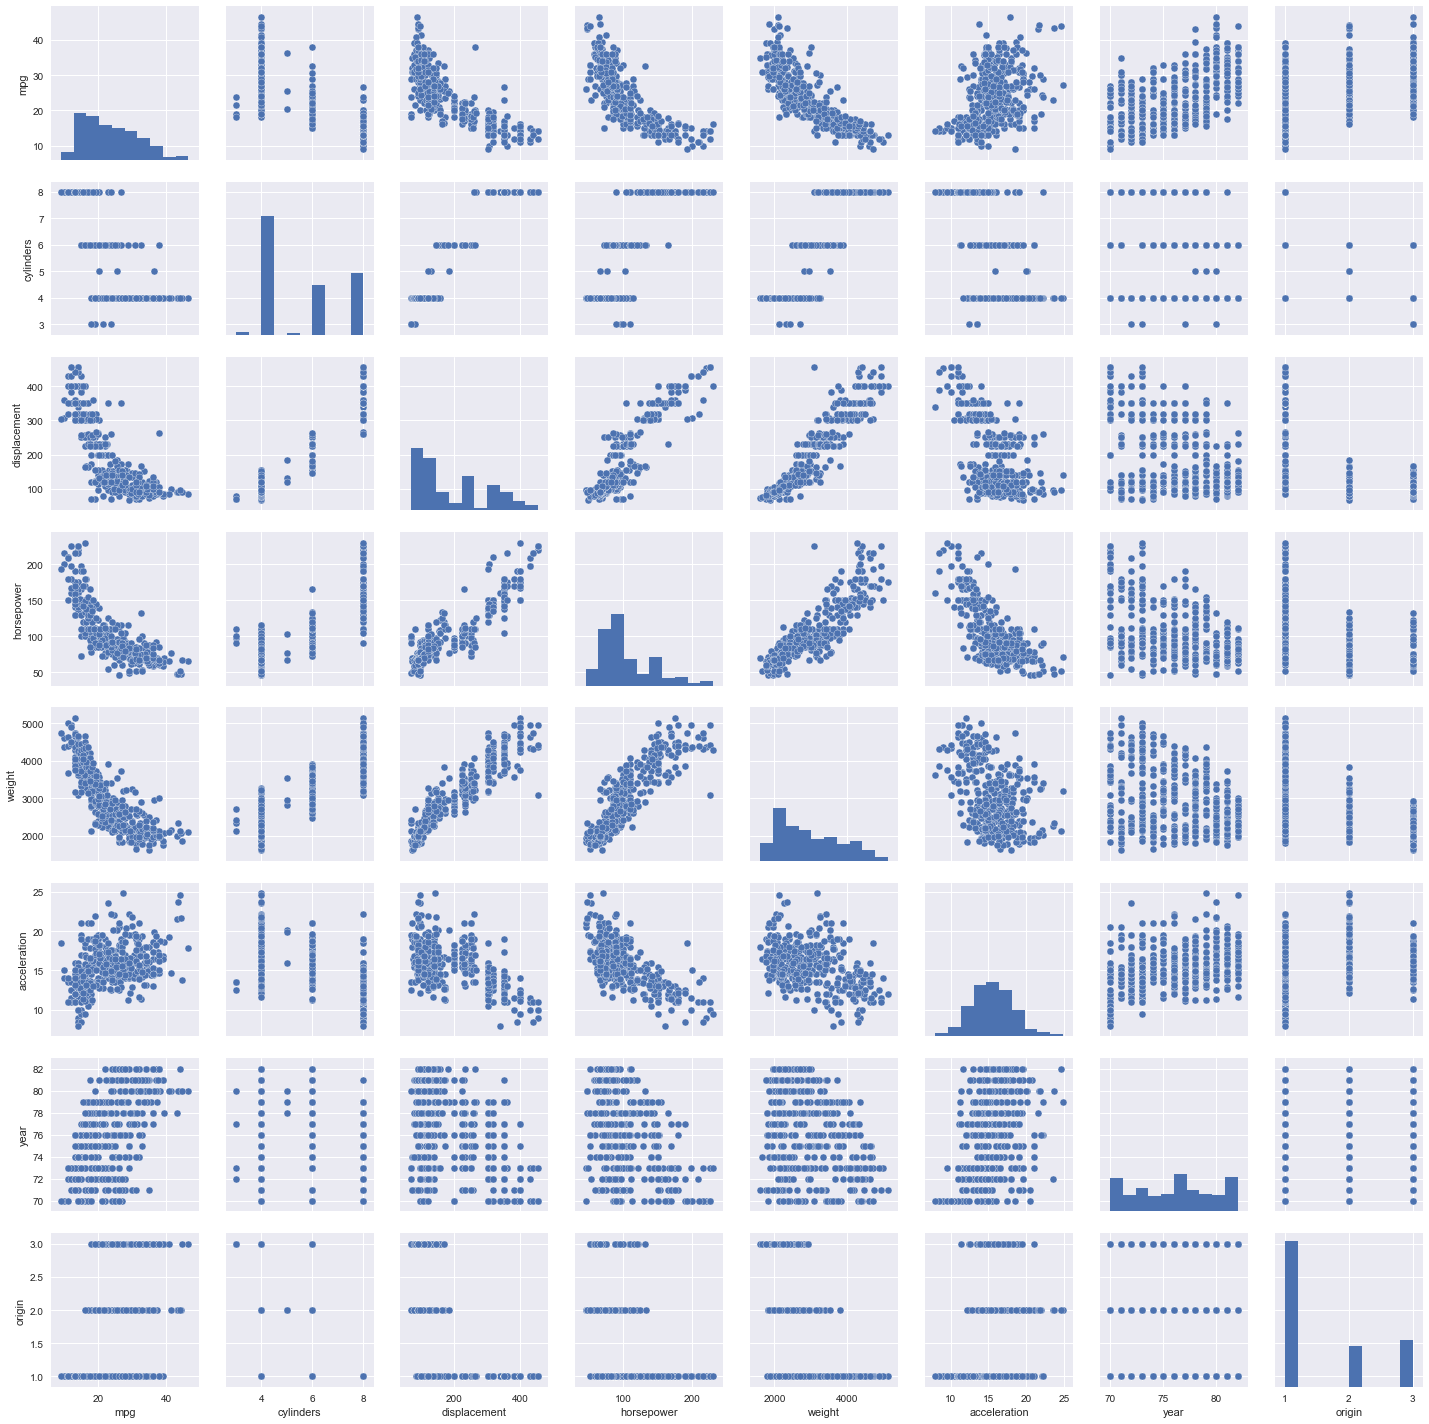

In [19]:
# scatterplot of al the values in auto dataset
sns.pairplot(auto)

In [20]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [21]:
mult_linreg = lr_sklrn.fit(auto.ix[:, :-1], auto.mpg)
mult_linreg_mstat = lr = smf.ols(formula='mpg ~ cylinders + displacement + horsepower  + weight + acceleration + year + origin ', data=auto).fit()

In [22]:
mult_linreg_mstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          2.04e-139
Time:                        22:37:52   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

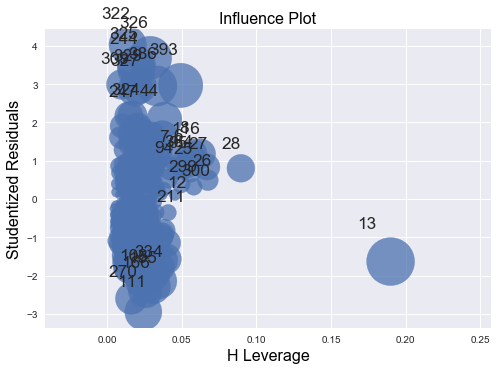

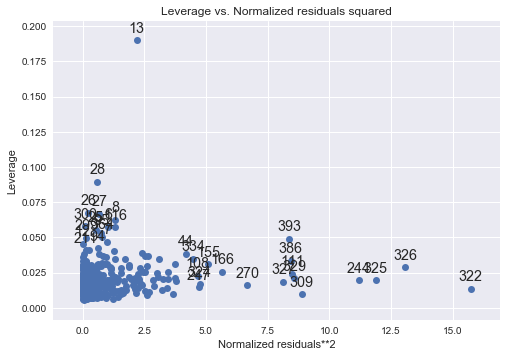

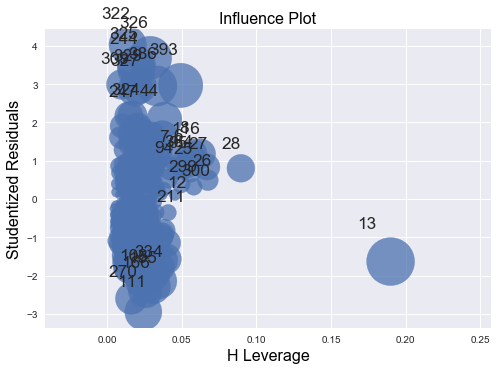

In [23]:
# residuals vs leverage
import statsmodels.api as sm
sm.graphics.plot_leverage_resid2(mult_linreg_mstat)
sm.graphics.influence_plot(mult_linreg_mstat)


In [24]:
# Interaction effect

mult_linreg_mstat2 = lr = smf.ols(formula='mpg ~ cylinders + displacement + horsepower  + weight + acceleration + year + origin + horsepower * acceleration', data=auto).fit()

In [25]:
mult_linreg_mstat2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          8.74e-148
Time:                        22:37:53   Log-Likelihood:                -1000.8
No. Observations:                 392   AIC:                             2020.
Df Residuals:                     383   BIC:                             2055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 -32.4998      4.923     -6.601      0.000       -42.180   -22.820
cylinders                   0.0835      0.317      0.263      0.792        -0.540     0.707
displacement               -0.0076      0.008     -0.937      0.349        -0.024     0.008
horsepower                  0.1272      0.025      5.140      0.000         0.079     0.176
weight                     -0.0040      0.001     -5.552      0.000        -0.005    -0.003
acceleration                0.9833      0.162      6.088      0.000         0.666     1.301
year                        0.7559      0.048     15.690      0.000         0.661     0.851
origin                      1.0357      0.269      3.851      0.000         0.507     1.565
horsepower:acceleration    -0.0121      0.002     -6.851      0.000        -0.016    -0.009
==============================================================================
Omnibus:                       21.612   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.894
Skew:                           0.382   Prob(JB):                     2.65e-08
Kurtosis:                       4.246   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
# my small tinkerings with stock and linear regression
atvi = pd.read_csv('C:/Users/yo/Documents/ML_and_Python/ML_and_Python_courses_videos/Sentdex/Getting SP500 Data/stock_dfs/ATVI.csv', parse_dates=True, index_col="Date")

import talib as ta
atvi.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,15.7500,16.500,14.0000,16.4375,7225800,1.259640
2000-01-04,16.1250,16.250,14.2500,15.9375,4262400,1.221324
2000-01-05,15.8125,16.375,15.7500,16.0000,3389000,1.226114
2000-01-06,15.8750,16.000,15.5625,15.6875,2429000,1.202166
2000-01-07,15.8750,16.250,15.5000,16.1250,15549000,1.235693


In [124]:
gspc = pd.read_csv('C:/Users/yo/Documents/ML_and_Python/ML_and_Python_courses_videos/Sentdex/Getting SP500 Data/stock_dfs/GSPC.csv', parse_dates=True, index_col="Date")

In [125]:
# gspc['day_change_hl'] = round(gspc['High']/gspc['Low'] - 1, 2)
# gspc['day_change_co'] = round(gspc['Close']/gspc['Open'] - 1, 2)
# gspc.head()
gspc.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc['pct_change'] = round(gspc['Adj_Close'].pct_change().dropna(), 3)
gspc['rsi15'] = ta.RSI(gspc.Adj_Close.values, timeperiod=15)
gspc['rsi16'] = ta.RSI(gspc.Adj_Close.values, timeperiod=16)
gspc['rsi17'] = ta.RSI(gspc.Adj_Close.values, timeperiod=17)
gspc['rsi14'] = ta.RSI(gspc.Adj_Close.values, timeperiod=14)
gspc['rsi13'] = ta.RSI(gspc.Adj_Close.values, timeperiod=13)
gspc['rsi12'] = ta.RSI(gspc.Adj_Close.values, timeperiod=12)
gspc['lr3_10'], gspc['lr3_10signal'], gspc['hist'] = talib.MACDEXT(gspc.Adj_Close.values, fastperiod=3, fastmatype=0, slowperiod=10, slowmatype=0, signalperiod=16, signalmatype=0)
gspc['pct_change13'] = round(gspc['Adj_Close'].pct_change(13).dropna(), 3)
gspc['pct_change14'] = round(gspc['Adj_Close'].pct_change(14).dropna(), 3)
gspc['pct_change15'] = round(gspc['Adj_Close'].pct_change(15).dropna(), 3)
gspc['pct_change16'] = round(gspc['Adj_Close'].pct_change(16).dropna(), 3)
gspc['pct_change17'] = round(gspc['Adj_Close'].pct_change(17).dropna(), 3)
gspc['pct_change18'] = round(gspc['Adj_Close'].pct_change(18).dropna(), 3)
gspc['pct_change19'] = round(gspc['Adj_Close'].pct_change(19).dropna(), 3)
gspc['pct_change20'] = round(gspc['Adj_Close'].pct_change(20).dropna(), 3)
gspc['pct_change21'] = round(gspc['Adj_Close'].pct_change(21).dropna(), 3)
gspc['pct_change22'] = round(gspc['Adj_Close'].pct_change(22).dropna(), 3)
gspc['pct_change23'] = round(gspc['Adj_Close'].pct_change(23).dropna(), 3)
gspc['pct_change24'] = round(gspc['Adj_Close'].pct_change(24).dropna(), 3)
gspc['pct_change25'] = round(gspc['Adj_Close'].pct_change(25).dropna(), 3)

gspc.dropna(inplace=True)
# gspc = gspc.drop(['pct_change9', 'pct_change10','pct_change11','pct_change12','pct_change13'], axis=1)
gspc.head(20)

,Open,High,Low,Close,Volume,Adj_Close,pct_change,rsi15,rsi16,rsi17,rsi14,rsi13,rsi12,lr3_10,lr3_10signal,hist,pct_change13,pct_change14,pct_change15,pct_change16,pct_change17,pct_change18,pct_change19,pct_change20,pct_change21,pct_change22,pct_change23,pct_change24,pct_change25
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01,2269.719971,2279.270020,2265.270020,2268.899902,3638790000,2268.899902,-0.003,30.000380,29.683058,29.248036,30.412075,30.942120,31.890979,0.618343,-6.361312,6.979655,-0.005,-0.004,-0.005,-0.005,-0.012,-0.010,-0.011,-0.011,-0.017,-0.020,-0.025,-0.029,-0.034
2017-09-01,2273.590088,2275.489990,2268.899902,2268.899902,3217610000,2268.899902,0.000,30.000380,29.683058,29.248036,30.412075,30.942120,31.890979,1.222013,-5.231622,6.453635,-0.011,-0.005,-0.004,-0.005,-0.005,-0.012,-0.010,-0.011,-0.011,-0.017,-0.020,-0.025,-0.029
2017-06-01,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980,0.004,35.626547,34.966129,34.223288,36.435974,37.430274,38.872043,0.597314,-4.121460,4.718774,-0.009,-0.008,-0.002,-0.001,-0.001,-0.002,-0.009,-0.007,-0.007,-0.008,-0.013,-0.017,-0.022
2017-05-01,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000,-0.004,32.834061,32.401598,31.871520,33.364160,34.011417,35.006260,0.861686,-3.291749,4.153435,-0.013,-0.012,-0.011,-0.005,-0.004,-0.005,-0.005,-0.012,-0.010,-0.011,-0.011,-0.017,-0.020
2017-04-01,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000,0.001,34.048680,33.541780,32.945183,34.665022,35.412945,36.516635,0.772379,-2.916848,3.689228,-0.004,-0.012,-0.011,-0.010,-0.004,-0.004,-0.004,-0.004,-0.012,-0.010,-0.010,-0.010,-0.016
2017-03-01,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078,-0.006,29.787668,29.608902,29.320564,30.007455,30.270835,30.759538,-4.204940,-3.294006,-0.910933,-0.003,-0.010,-0.018,-0.017,-0.016,-0.010,-0.009,-0.010,-0.010,-0.017,-0.015,-0.015,-0.016
2016-12-30,2251.610107,2253.580078,2233.620117,2238.830078,2670900000,2238.830078,-0.008,24.881467,25.009049,25.019535,24.742551,24.583819,24.550145,-11.355599,-4.458917,-6.896682,-0.014,-0.012,-0.018,-0.026,-0.025,-0.024,-0.018,-0.018,-0.018,-0.018,-0.026,-0.023,-0.024
2016-12-29,2249.500000,2254.510010,2244.560059,2249.260010,2336370000,2249.260010,0.005,31.515704,31.261870,30.929056,31.814895,32.162912,32.687470,-15.980941,-5.689644,-10.291297,-0.006,-0.010,-0.007,-0.014,-0.021,-0.021,-0.020,-0.014,-0.013,-0.013,-0.014,-0.021,-0.019
2016-12-28,2270.229980,2271.310059,2249.110107,2249.919922,2392360000,2249.919922,0.000,31.923281,31.646516,31.293086,32.248726,32.627005,33.184854,-16.565657,-6.472083,-10.093574,-0.010,-0.006,-0.009,-0.007,-0.013,-0.021,-0.020,-0.020,-0.014,-0.013,-0.013,-0.014,-0.021


In [102]:
# atvi['day_change_hl'] = round(atvi['High']/atvi['Low'] - 1, 2)
# atvi['day_change_co'] = round(atvi['Close']/atvi['Open'] - 1, 2)
# atvi.head()
atvi.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
atvi['pct_change'] = round(atvi['Adj_Close'].pct_change().dropna(), 3)
atvi['rsi15'] = ta.RSI(atvi.Adj_Close.values, timeperiod=15)
atvi['rsi16'] = ta.RSI(atvi.Adj_Close.values, timeperiod=16)
atvi['rsi17'] = ta.RSI(atvi.Adj_Close.values, timeperiod=17)
atvi['rsi14'] = ta.RSI(atvi.Adj_Close.values, timeperiod=14)
atvi['rsi13'] = ta.RSI(atvi.Adj_Close.values, timeperiod=13)
atvi['rsi12'] = ta.RSI(atvi.Adj_Close.values, timeperiod=12)
atvi['lr3_10'], atvi['lr3_10signal'], atvi['hist'] = talib.MACDEXT(atvi.Adj_Close.values, fastperiod=3, fastmatype=0, slowperiod=10, slowmatype=0, signalperiod=16, signalmatype=0)
atvi['pct_change13'] = round(atvi['Adj_Close'].pct_change(13).dropna(), 3)
atvi['pct_change14'] = round(atvi['Adj_Close'].pct_change(14).dropna(), 3)
atvi['pct_change15'] = round(atvi['Adj_Close'].pct_change(15).dropna(), 3)
atvi['pct_change16'] = round(atvi['Adj_Close'].pct_change(16).dropna(), 3)
atvi['pct_change17'] = round(atvi['Adj_Close'].pct_change(17).dropna(), 3)
atvi['pct_change18'] = round(atvi['Adj_Close'].pct_change(18).dropna(), 3)
atvi['pct_change19'] = round(atvi['Adj_Close'].pct_change(19).dropna(), 3)
atvi['pct_change20'] = round(atvi['Adj_Close'].pct_change(20).dropna(), 3)
atvi['pct_change21'] = round(atvi['Adj_Close'].pct_change(21).dropna(), 3)
atvi['pct_change22'] = round(atvi['Adj_Close'].pct_change(22).dropna(), 3)
atvi['pct_change23'] = round(atvi['Adj_Close'].pct_change(23).dropna(), 3)
atvi['pct_change24'] = round(atvi['Adj_Close'].pct_change(24).dropna(), 3)
atvi['pct_change25'] = round(atvi['Adj_Close'].pct_change(25).dropna(), 3)

atvi.dropna(inplace=True)
# atvi = atvi.drop(['pct_change9', 'pct_change10','pct_change11','pct_change12','pct_change13'], axis=1)
atvi.head(20)

,Open,High,Low,Close,Volume,Adj_Close,pct_change,rsi15,rsi16,rsi17,rsi14,rsi13,rsi12,lr3_10,lr3_10signal,hist,pct_change13,pct_change14,pct_change15,pct_change16,pct_change17,pct_change18,pct_change19,pct_change20,pct_change21,pct_change22,pct_change23,pct_change24,pct_change25
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-03-14,13.8125,14.0625,13.000000,13.8750,2685000,1.063270,0.023,44.970540,44.411359,44.427308,45.614185,46.256162,46.840922,-0.016444,-0.003315,-0.013129,0.057,0.062,0.037,0.028,-0.011,-0.010,-0.009,-0.035,-0.067,-0.039,-0.045,-0.059,-0.075
2000-03-15,14.0000,14.0000,12.812500,13.0000,7386800,0.996217,-0.063,39.130466,38.894661,39.172522,39.398095,39.614835,39.728026,-0.038476,-0.003068,-0.035408,0.020,-0.010,-0.005,-0.028,-0.037,-0.073,-0.072,-0.071,-0.096,-0.126,-0.100,-0.105,-0.119
2000-03-16,13.7500,13.7500,12.937500,13.0000,2022600,0.996217,0.000,39.130466,38.894661,39.172522,39.398095,39.614835,39.728026,-0.041350,-0.002262,-0.039087,0.035,0.020,-0.010,-0.005,-0.028,-0.037,-0.073,-0.072,-0.071,-0.096,-0.126,-0.100,-0.105
2000-03-17,12.8750,13.6250,12.875000,13.0937,3273600,1.003398,0.007,40.087009,39.805757,40.030079,40.406768,40.685218,40.872367,-0.048135,-0.001956,-0.046180,0.032,0.042,0.027,-0.002,0.002,-0.021,-0.030,-0.067,-0.066,-0.065,-0.089,-0.120,-0.093
2000-03-20,13.2500,14.1250,13.156199,13.5000,2267600,1.034533,0.031,44.163178,43.688803,43.687390,44.704162,45.244172,45.744676,-0.028658,-0.000242,-0.028416,-0.069,0.064,0.075,0.059,0.029,0.033,0.009,0.000,-0.038,-0.037,-0.036,-0.061,-0.092
2000-03-21,13.8125,14.0000,13.250000,13.4375,840400,1.029744,-0.005,43.673503,43.231252,43.256265,44.176471,44.672040,45.120789,-0.015088,0.002011,-0.017098,-0.073,-0.073,0.059,0.070,0.054,0.024,0.029,0.005,-0.005,-0.042,-0.041,-0.040,-0.065
2000-03-22,13.6250,13.9375,13.312500,13.3750,1156400,1.024954,-0.005,43.160653,42.753545,42.807330,43.621831,44.068215,44.459174,-0.009339,0.004513,-0.013852,-0.097,-0.078,-0.078,0.054,0.065,0.049,0.019,0.024,0.000,-0.009,-0.047,-0.046,-0.045
2000-03-23,13.3125,13.5000,12.625000,12.8750,2265600,0.986638,-0.037,39.214065,39.069888,39.337448,39.364351,39.447566,39.415683,-0.013330,0.004211,-0.017541,-0.104,-0.131,-0.112,-0.112,0.015,0.025,0.010,-0.019,-0.014,-0.037,-0.046,-0.082,-0.081
2000-03-24,13.0000,13.6250,12.750000,13.6250,4598600,1.044112,0.058,47.002398,46.451845,46.277645,47.622281,48.262799,48.901188,-0.003273,0.001676,-0.004949,-0.009,-0.052,-0.080,-0.060,-0.060,0.074,0.085,0.069,0.038,0.043,0.019,0.009,-0.029


In [98]:
# lst = [atvi]
# del lst

In [177]:

lr_atvi = smf.ols(formula='pct_change20 ~ rsi16', data=atvi).fit()
clf = LinearRegression()
clf.fit(atvi.rsi16.values.reshape(-1,1)[0:3000], atvi.pct_change20[0:3000])
clf.predict(atvi.rsi16.values.reshape(-1,1))


lr_gspc = smf.ols(formula='pct_change20 ~ rsi16+lr3_10 + hist', data=gspc).fit()
print("GSPC Summary", lr_gspc.summary())
print("ATVI Summary", lr_atvi.summary())
clf.score(atvi.rsi16.values.reshape(-1,1)[3000:], atvi.pct_change20[3000:])
# lr = LinearRegression()
# regline = lr_atvi.fit(auto.horsepower.values.reshape(-1, 1), auto.mpg)
# response = lr_sklrn.predict(auto.horsepower.values.reshape(-1, 1))
# predicted_values = lr_sklrn.predict(auto.horsepower.values.reshape(-1, 1))
# lr_sklrn.predict([[98]])
# lr.conf_int()


GSPC Summary                             OLS Regression Results                            
Dep. Variable:           pct_change20   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.686e+04
Date:                Thu, 16 Feb 2017   Prob (F-statistic):               0.00
Time:                        14:09:14   Log-Likelihood:                 40891.
No. Observations:               16865   AIC:                        -8.177e+04
Df Residuals:                   16861   BIC:                        -8.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1077      0.001   -142

0.40426664811497659

In [103]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
atvi.ix[:, 6:].corr()

,pct_change,rsi15,rsi16,rsi17,rsi14,rsi13,rsi12,lr3_10,lr3_10signal,hist,pct_change13,pct_change14,pct_change15,pct_change16,pct_change17,pct_change18,pct_change19,pct_change20,pct_change21,pct_change22,pct_change23,pct_change24,pct_change25
pct_change,1.000000,0.312770,0.304403,0.296673,0.321887,0.331883,0.342916,0.101492,0.000459,0.109159,0.262408,0.264439,0.253658,0.243200,0.239732,0.233655,0.227172,0.220984,0.218425,0.204074,0.200147,0.202919,0.191283
rsi15,0.312770,1.000000,0.999437,0.997910,0.999355,0.997228,0.993274,0.587510,0.584888,0.246504,0.789927,0.797638,0.802154,0.806607,0.810057,0.812184,0.812614,0.812240,0.810638,0.807763,0.803708,0.800366,0.796253
rsi16,0.304403,0.999437,1.000000,0.999514,0.997591,0.994186,0.988878,0.578354,0.590385,0.232989,0.784987,0.793708,0.799295,0.804779,0.809205,0.812303,0.813673,0.814226,0.813558,0.811647,0.808535,0.806003,0.802742
rsi17,0.296673,0.997910,0.999514,1.000000,0.994959,0.990384,0.983843,0.569573,0.594581,0.220742,0.779431,0.789043,0.795580,0.801981,0.807280,0.811251,0.813473,0.814871,0.815051,0.814024,0.811779,0.810001,0.807533
rsi14,0.321887,0.999355,0.997591,0.994959,1.000000,0.999254,0.996776,0.596837,0.577617,0.261375,0.794097,0.800656,0.803959,0.807255,0.809614,0.810667,0.810066,0.808679,0.806061,0.802139,0.797068,0.792865,0.787848
rsi13,0.331883,0.997228,0.994186,0.990384,0.999254,1.000000,0.999128,0.606241,0.568168,0.277772,0.797232,0.802474,0.804403,0.806398,0.807540,0.807405,0.805678,0.803193,0.799471,0.794419,0.788261,0.783151,0.777183
rsi12,0.342916,0.993274,0.988878,0.983843,0.996776,0.999128,1.000000,0.615597,0.556050,0.295885,0.798970,0.802707,0.803076,0.803608,0.803397,0.801956,0.799004,0.795332,0.790423,0.784158,0.776846,0.770791,0.763837
lr3_10,0.101492,0.587510,0.578354,0.569573,0.596837,0.606241,0.615597,1.000000,0.421196,0.799742,0.469948,0.447296,0.428309,0.412883,0.399192,0.389294,0.381465,0.374461,0.366581,0.358363,0.349635,0.340727,0.333267
lr3_10signal,0.000459,0.584888,0.590385,0.594581,0.577617,0.568168,0.556050,0.421196,1.000000,-0.207646,0.443781,0.472114,0.498641,0.524598,0.545723,0.560323,0.566120,0.565466,0.559343,0.550725,0.539234,0.525258,0.512417
hist,0.109159,0.246504,0.232989,0.220742,0.261375,0.277772,0.295885,0.799742,-0.207646,1.000000,0.213109,0.169924,0.131887,0.098068,0.069318,0.048979,0.036699,0.029577,0.025130,0.021972,0.020165,0.019808,0.020261


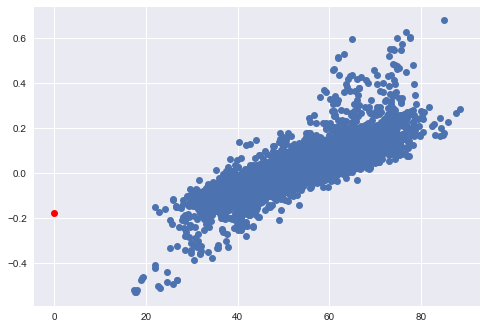

In [152]:
plt.plot(atvi.rsi16, atvi.pct_change19, 'o')
plt.plot(clf.predict([[30]]), 'ro')

[-0.2845286  -0.28438397 -0.28423934 ...,  0.32828488  0.32842951
  0.32857415]
[-0.05184054 -0.09933212 -0.09933212 ...,  0.07922692  0.08732666
  0.06626963]


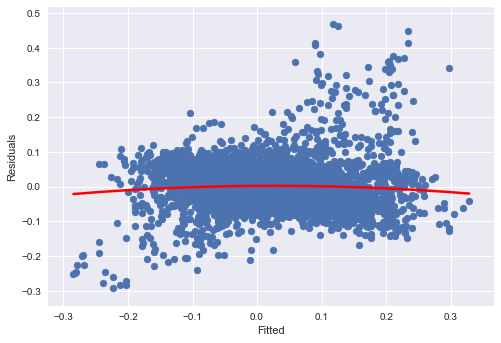

In [173]:
# Plotting a fitted regression with R returns 4 graphs - Residuals vs Fitted, Normal Q-Q,
# Scale-Location (Standardized Residuals vs Fitted), and Residuals vs Leverage. Only the 
# Q-Q plot is available from statsmodels. The residuals vs Fitted function is implemented
# below and is used for plot #1 and #3. The Residuals vs Leverage is TBD.
def residuals_vs_fitted(fitted, residuals, xlabel, ylabel):
    plt.subplot(111)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(fitted, residuals)
    polyline = np.poly1d(np.polyfit(fitted, residuals, 2))    # model non-linearity with quadratic
    xs = np.linspace(np.min(fitted), np.max(fitted), 4240)
    plt.plot(xs, polyline(xs), color='r', linewidth=2.5)  
    print(xs)

def qq_plot(residuals):
    sm.qqplot(residuals)

def standardize(xs):
    xmean = np.mean(xs)
    xstd = np.std(xs)
    return (xs - xmean) / xstd
    
fitted = clf.predict(atvi.rsi16.values.reshape(-1,1))
residuals = atvi.pct_change20 - fitted
std_residuals = standardize(residuals)

residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")
print(fitted)

In [157]:
# fitting pct_change20 ~ rsi16 * lr3_10
atvi["rsi16*lr3_10"] = atvi["rsi16"] * atvi["lr3_10"]
reg2 = LinearRegression()
X = atvi[["rsi16", "lr3_10", "rsi16*lr3_10"]]
y = atvi["pct_change20"]
reg2.fit(X, y)
(reg2.intercept_, reg2.coef_)

(-0.47951528100456231, array([ 0.00953168,  0.00250362, -0.00097211]))

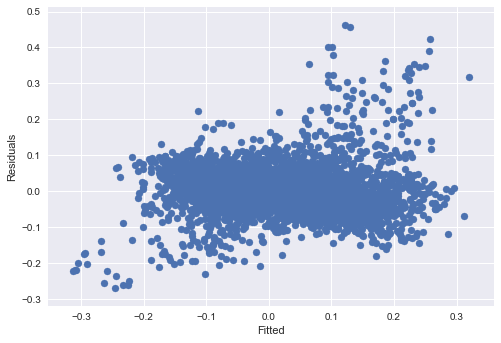

In [158]:
fitted = reg2.predict(X)
residuals = y - fitted
std_residuals = standardize(residuals)
residuals_vs_fitted(fitted, residuals, "Fitted", "Residuals")

In [41]:
gspc2.head(8)

,Open,High,Low,Close,Volume,Adj_Close,pct_change,maskk
Date,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,3770530000,2257.830078,NaN,False
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,3764890000,2270.750000,0.005722,False
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,3761820000,2269.000000,-0.000771,False
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,3339890000,2276.979980,0.003517,False
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,3217610000,2268.899902,-0.003549,False
2017-01-10,2269.719971,2279.270020,2265.270020,2268.899902,3638790000,2268.899902,0.000000,True
2017-01-11,2268.600098,2275.320068,2260.830078,2275.320068,3620410000,2275.320068,0.002830,False
2017-01-12,2271.139893,2271.780029,2254.250000,2270.439941,3462130000,2270.439941,-0.002145,False


In [ ]:
# Conditional selection & slicing & output of one column
atvi['pct_change'].value_counts()
std2 = atvi['pct_change'].std() *2
atvi_14 = atvi.ix[(atvi['pct_change'] > std2) | (atvi['pct_change'] < -std2), ['rsi14', 'pct_change']].dropna()
# atvi_14 = atvi.ix[(atvi['pct_change'] >= 0.05) & (atvi['pct_change'] <= 0.01), ['rsi14', 'pct_change']].dropna()